In [1]:
import numpy as np
import yfinance as yf

In [3]:
# Downloading Stock Market Data
data = yf.download("AAPL MSFT GOOGL", start="2020-01-01", end="2023-12-31")
print(data)

[*********************100%***********************]  3 of 3 completed

Price            Close                                High              \
Ticker            AAPL       GOOGL        MSFT        AAPL       GOOGL   
Date                                                                     
2020-01-02   72.716049   68.186813  153.323257   72.776575   68.186813   
2020-01-03   72.009125   67.830109  151.414139   72.771752   68.439404   
2020-01-06   72.582916   69.638054  151.805481   72.621654   69.663459   
2020-01-07   72.241531   69.503548  150.421356   72.849208   69.921535   
2020-01-08   73.403648   69.998245  152.817337   73.706279   70.337515   
...                ...         ...         ...         ...         ...   
2023-12-22  192.444595  140.978943  371.055725  194.243791  141.477137   
2023-12-26  191.897873  141.008835  371.134949  192.732856  142.164633   
2023-12-27  191.997253  139.862976  370.550507  192.345171  141.566806   
2023-12-28  192.424698  139.723495  371.749146  193.498254  140.630212   
2023-12-29  191.380966  139.185440  37

In [4]:
from hmmlearn.hmm import GaussianHMM

In [6]:
# Initializing and Training the HMM Model
model = GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000)
model.fit(data)
print("Training of Hidden Markov Model completed.")

Training of Hidden Markov Model completed.


In [7]:
# Predicting Market States
hidden_states = model.predict(data)

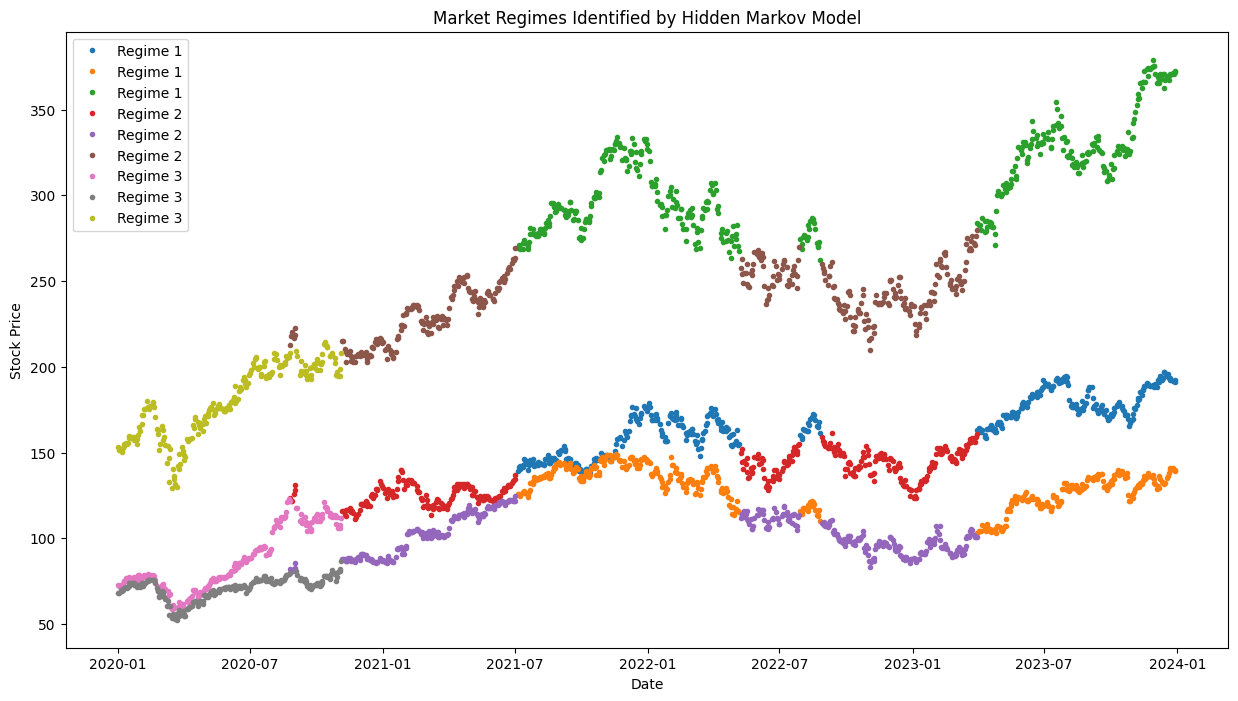

In [9]:
import matplotlib.pyplot as plt

# Visualizing Market Regimes
plt.figure(figsize=(15, 8))
for i in range(model.n_components):
    state = (hidden_states == i)
    plt.plot(data.index[state], data['Close'][state], '.', label=f"Regime {i+1}")
plt.title('Market Regimes Identified by Hidden Markov Model')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
  # Save plot as image file